In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from warnings import filterwarnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from scipy import stats
from warnings import filterwarnings
from google.colab import drive
import pprint

In [ ]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
pd.options.mode.chained_assignment = None 
filterwarnings(action='ignore')

## Loading datasets

In [ ]:
train_df = pd.read_csv('/content/gdrive/My Drive/titanic-dataset/dataset/train.csv')
X_test = pd.read_csv('/content/gdrive/My Drive/titanic-dataset/dataset/test.csv')

In [ ]:
submission = pd.read_csv('/content/gdrive/My Drive/titanic-dataset/dataset/test.csv')
submission = submission['PassengerId']

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
missing = pd.DataFrame()
missing['num of missed'] = train_df.isna().sum().sort_values(ascending=False)
missing['percent'] = train_df.isna().sum()/train_df.isna().count()
missing

,num of missed,percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [ ]:
# includes creating a new feature "family size" and "title" and dropping useless columns

def preprocessor(df):
    df['Title'] = '-'
    for i in df:
        df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    df['Family size'] = df['SibSp']+df['Parch']+1
    
    df.drop(['PassengerId', 'Name', 'Ticket', 'Parch',
            'SibSp', 'Cabin'], axis=1, inplace=True)
    return df

In [ ]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
train_df = preprocessor(train_df)

All done.
we'd better check if 'Fare' column is worth keeping it or not.

In [ ]:
train_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

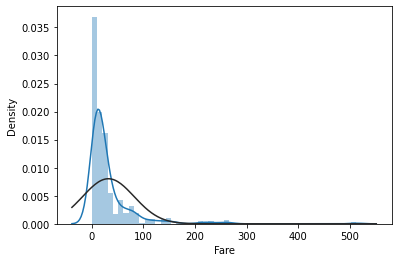

In [ ]:
sns.distplot(train_df['Fare'], fit=stats.norm)

Apparently huge amount of values are missed, because even though we have the average of this column is too low, So this column is not worth keeping and feeding it to our model. 

In [ ]:
train_df.drop(['Fare'], axis=1, inplace=True)

## Some info about the dataset

In [ ]:
# some barplots to see how the dataset looks like

def bar_visualizer(df, size):
    if size != 'default':
        plt.figure(figsize=(15,5))
    plot = sns.barplot(x=df[df.columns[0]],
                       y=df[df.columns[1]], palette='muted')
    for bar in plot.patches:
        plot.annotate(format(bar.get_height(), 'g'),
                      (bar.get_x() + bar.get_width() / 2,
                       bar.get_height()), ha='center', va='center',
                      size=12, xytext=(0, 4),
                      textcoords='offset points')

### Survived/Sex

In [ ]:
temp = train_df.groupby('Sex', as_index=False)['Survived'].sum()

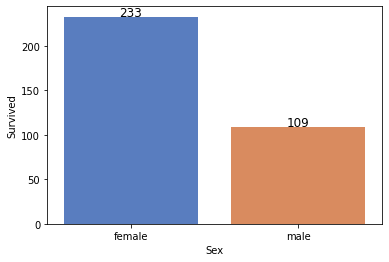

In [ ]:
bar_visualizer(temp, 'default')

### Survived/Pclass

In [ ]:
temp = train_df.groupby('Pclass', as_index=False)['Survived'].sum()
temp

,Pclass,Survived
0,1,136
1,2,87
2,3,119


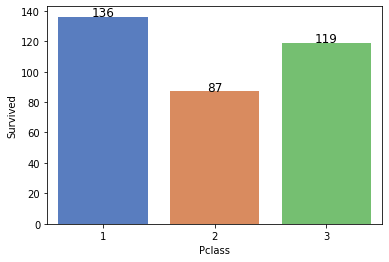

In [ ]:
bar_visualizer(temp, 'default')

### Survived/Embarked

In [ ]:
temp = train_df.groupby('Embarked', as_index=False)['Survived'].sum()

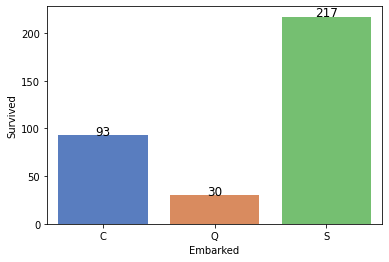

In [ ]:
bar_visualizer(temp, 'default')

### Survived/Family Size

In [ ]:
temp = train_df.groupby('Family size', as_index=False)['Survived'].sum()

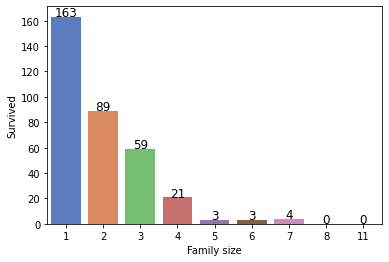

In [ ]:
bar_visualizer(temp, 'default')

### Survived/Average Age

In [ ]:
temp = train_df.groupby('Survived', as_index=False)['Age'].mean()
temp

,Survived,Age
0,0,30.626179
1,1,28.343690


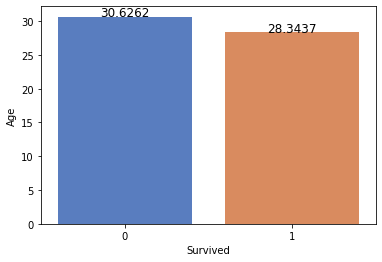

In [ ]:
bar_visualizer(temp, 'default')

### Survived/Title

In [ ]:
temp = train_df.groupby('Title', as_index=False)['Age'].mean()

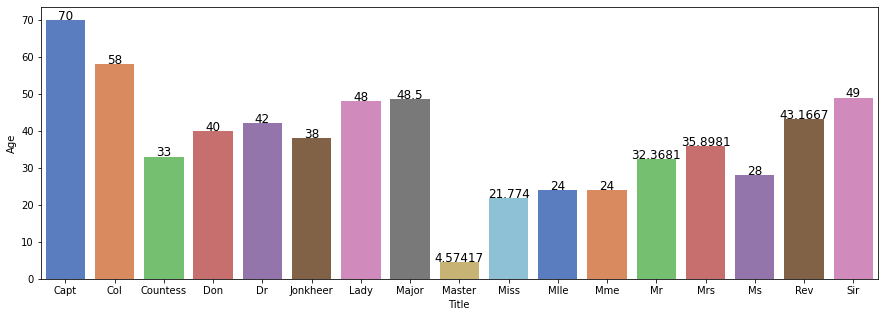

In [ ]:
bar_visualizer(temp, 'non-default')

## Imputing missing values

In [ ]:
train_df.isna().sum()

Survived         0
Pclass           0
Sex              0
Age            177
Embarked         2
Title            0
Family size      0
dtype: int64

### Embarked

In [ ]:
# there are just two of missing values in this column, we can easily drop them.

train_df.dropna(subset=['Embarked'], inplace=True)

### Age

In [ ]:
# since we know each person's title, we could use it as an estimator for imputing this column
title_age = train_df.groupby(
    'Title')['Age'].mean()

title_age = title_age.to_dict()
title_age

{'Capt': 70.0,
 'Col': 58.0,
 'Countess': 33.0,
 'Don': 40.0,
 'Dr': 42.0,
 'Jonkheer': 38.0,
 'Lady': 48.0,
 'Major': 48.5,
 'Master': 4.574166666666667,
 'Miss': 21.662068965517243,
 'Mlle': 24.0,
 'Mme': 24.0,
 'Mr': 32.368090452261306,
 'Mrs': 35.654205607476634,
 'Ms': 28.0,
 'Rev': 43.166666666666664,
 'Sir': 49.0}

In [ ]:
indexes = train_df.loc[train_df['Age'].isna()].index

for index in indexes:
    for key in title_age.keys():
        if train_df['Title'][index] == key:
            train_df['Age'][index] = title_age[key]

## Categorical Features

'Title' is a categorical feature and we only needed it for imputing NaN variables in 'Age' column, so we can drop it now.

In [ ]:
train_df.drop('Title', axis=1, inplace=True)

In [ ]:
train_df = pd.get_dummies(train_df, drop_first=True)
train_df

,Survived,Pclass,Age,Family size,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.000000,2,1,0,1
1,1,1,38.000000,2,0,0,0
2,1,3,26.000000,1,0,0,1
3,1,1,35.000000,2,0,0,1
4,0,3,35.000000,1,1,0,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,1,1,0,1
887,1,1,19.000000,1,0,0,1
888,0,3,21.662069,4,0,0,1
889,1,1,26.000000,1,1,0,0


Sex: 1 male, 0 female <br>
Embarked: 2 S, 0 C, 1 Q

## Train and Validation split

In [ ]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X

,Pclass,Age,Family size,Sex_male,Embarked_Q,Embarked_S
0,3,22.000000,2,1,0,1
1,1,38.000000,2,0,0,0
2,3,26.000000,1,0,0,1
3,1,35.000000,2,0,0,1
4,3,35.000000,1,1,0,1
...,...,...,...,...,...,...
886,2,27.000000,1,1,0,1
887,1,19.000000,1,0,0,1
888,3,21.662069,4,0,0,1
889,1,26.000000,1,1,0,0


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
X_train

,Pclass,Age,Family size,Sex_male,Embarked_Q,Embarked_S
708,1,22.000000,1,0,0,1
240,3,21.662069,2,0,0,0
382,3,32.000000,1,1,0,1
792,3,21.662069,11,0,0,1
683,3,14.000000,8,1,0,1
...,...,...,...,...,...,...
107,3,32.368090,1,1,0,1
271,3,25.000000,1,1,0,1
862,1,48.000000,1,0,0,1
436,3,21.000000,5,0,0,1


## Training a model

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

### Random Forest(default parameters)

In [ ]:
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_val)

In [ ]:
print(accuracy_score(y_pred, y_val))

0.8202247191011236


In [ ]:
classifier.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)>

### Random Forest(optimized parameters)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)


min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

criterion = ['gini', 'entropy']

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}
param_grid

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000]}

In [ ]:
rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(estimator = rf, param_grid=param_grid, cv = 3, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

In [ ]:
grid_result.best_params_

{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'n_estimators': 944}

In [ ]:
grid_result.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=944,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

## Preprocessing the test set

In [ ]:
X_test = preprocessor(X_test)

In [ ]:
X_test

,Pclass,Sex,Age,Fare,Embarked,Title,Family size
0,3,male,34.5,7.8292,Q,Mr,1
1,3,female,47.0,7.0000,S,Mrs,2
2,2,male,62.0,9.6875,Q,Mr,1
3,3,male,27.0,8.6625,S,Mr,1
4,3,female,22.0,12.2875,S,Mrs,3
...,...,...,...,...,...,...,...
413,3,male,NaN,8.0500,S,Mr,1
414,1,female,39.0,108.9000,C,Dona,1
415,3,male,38.5,7.2500,S,Mr,1
416,3,male,NaN,8.0500,S,Mr,1


In [ ]:
X_test.isna().sum()

Pclass          0
Sex             0
Age            86
Fare            1
Embarked        0
Title           0
Family size     0
dtype: int64

In [ ]:
X_test.drop(['Fare'], axis=1, inplace=True)

In [ ]:
title_age = X_test.groupby(
    'Title')['Age'].mean()

title_age = title_age.to_dict()
title_age

{'Col': 50.0,
 'Dona': 39.0,
 'Dr': 53.0,
 'Master': 7.406470588235294,
 'Miss': 21.774843750000002,
 'Mr': 32.0,
 'Mrs': 38.903225806451616,
 'Ms': nan,
 'Rev': 35.5}

In [ ]:
title_age['Ms'] = 28

In [ ]:
indexes = X_test.loc[X_test['Age'].isna()].index

for index in indexes:
    for key in title_age.keys():
        if X_test['Title'][index] == key:
            X_test['Age'][index] = title_age[key]

In [ ]:
X_test.drop('Title', axis=1, inplace=True)

In [ ]:
X_test = pd.get_dummies(X_test, drop_first=True)
X_test

,Pclass,Age,Family size,Sex_male,Embarked_Q,Embarked_S
0,3,34.500000,1,1,1,0
1,3,47.000000,2,0,0,1
2,2,62.000000,1,1,1,0
3,3,27.000000,1,1,0,1
4,3,22.000000,3,0,0,1
...,...,...,...,...,...,...
413,3,32.000000,1,1,0,1
414,1,39.000000,1,0,0,0
415,3,38.500000,1,1,0,1
416,3,32.000000,1,1,0,1


### Predicting the test set

In [ ]:
y_pred = grid_result.predict(X_test)

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
submission = pd.DataFrame(submission)

In [ ]:
submission['Survived'] = y_pred

In [ ]:
submission.to_csv('submission.csv', index=False)